In [2]:
#f(x) = sin(x^2 + y^2)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return np.sin((x ** 2 + y ** 2))

x = np.linspace(-1.5, 1.5, 30)
y = np.linspace(-1.5, 1.5, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [26]:
# generate training inputs
np.random.seed(0)

n_train = 20000
n_valid = 2000

x_train = np.zeros((n_train, 2)) #x_train is a N_train x 2 matrix now 
x_valid = np.zeros((n_valid, 2)) #x_valid is a N_valid x 2 matrix now 
y_train = np.zeros(n_train)
y_valid = np.zeros(n_valid)

sigma = 0.2

for i in range(n_train):
    #fill the matrix x_train and y_train
    x_train[i,0] = np.random.uniform(-1.5,1.5) 
    x_train[i,1] = np.random.uniform(-1.5,1.5)
    y_train[i] = np.random.normal(f(x_train[i,0],x_train[i,1]),sigma)

for i in range(n_valid):
    #fill the matrix x_valid and y_valid
    x_valid[i,0] = np.random.uniform(-1.5,1.5)
    x_valid[i,1] = np.random.uniform(-1.5,1.5)
    y_valid[i] = np.random.normal(f(x_valid[i,0],x_valid[i,1]),sigma)


Plot of the Validation Data Sets


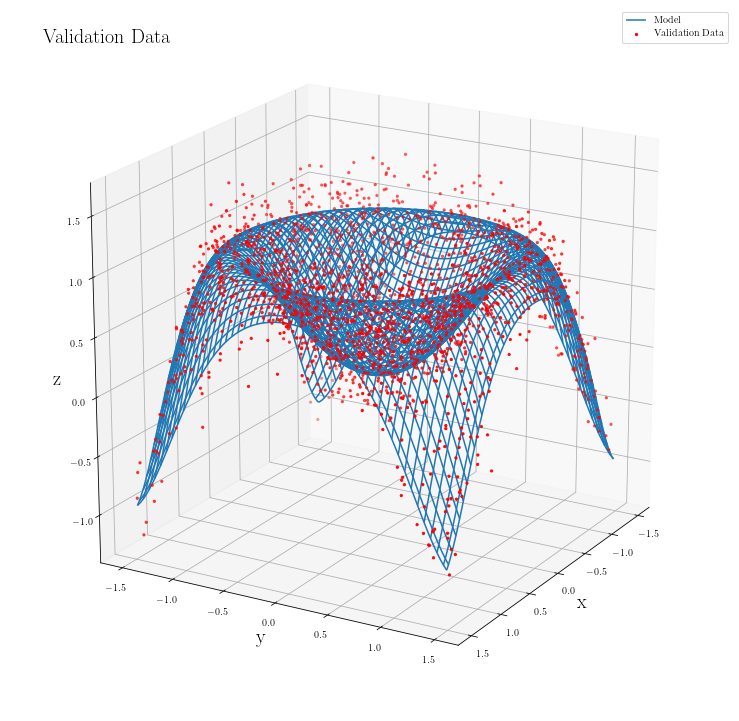

In [41]:
# plot validation and target dataset
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

x_plot = np.arange(-1.5,1.5, 0.03)
y_plot = np.arange(-1.5,1.5, 0.03)
X_plot, Y_plot = np.meshgrid(x_plot,y_plot)

fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111, projection='3d')

#3D plot of the validation data and the target distribution
ax.plot_wireframe(X_plot, Y_plot, f(X_plot,Y_plot), rstride=2, cstride=2, label='Model')
ax.scatter(np.transpose(x_valid)[0], np.transpose(x_valid)[1], y_valid, color='red', marker='.', label='Validation Data')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
ax.text2D(0.05, 0.95, "Validation Data", transform=ax.transAxes, fontsize=20)
ax.view_init(20, 30)
ax.legend()
plt.show()

In [28]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(40, input_shape=(2,), activation='relu')) #input_shape now takes 2 input parameters (x, y)
model.add(Dense(35, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [29]:
# get a summary of our composed model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 40)                120       
_________________________________________________________________
dense_9 (Dense)              (None, 35)                1435      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 2,666
Trainable params: 2,666
Non-trainable params: 0
_________________________________________________________________


In [30]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, #z=z_train,  
          batch_size=32, epochs=60,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/60
625/625 [==============================] - 1s 2ms/step - loss: 0.1882 - mse: 0.1882 - val_loss: 0.1690 - val_mse: 0.1690
Epoch 2/60
625/625 [==============================] - 1s 1ms/step - loss: 0.1658 - mse: 0.1658 - val_loss: 0.1556 - val_mse: 0.1556
Epoch 3/60
625/625 [==============================] - 1s 1ms/step - loss: 0.1504 - mse: 0.1504 - val_loss: 0.1389 - val_mse: 0.1389
Epoch 4/60
625/625 [==============================] - 1s 1ms/step - loss: 0.1307 - mse: 0.1307 - val_loss: 0.1184 - val_mse: 0.1184
Epoch 5/60
625/625 [==============================] - 1s 1ms/step - loss: 0.1090 - mse: 0.1090 - val_loss: 0.0980 - val_mse: 0.0980
Epoch 6/60
625/625 [==============================] - 1s 2ms/step - loss: 0.0886 - mse: 0.0886 - val_loss: 0.0806 - val_mse: 0.0806
Epoch 7/60
625/625 [==============================] - 1s 2ms/step - loss: 0.0722 - mse: 0.0722 - val_loss: 0.0664 - val_mse: 0.0664
Epoch 8/60
625/625 [==============================] - 1s 1ms/step - loss: 0.

In [31]:
# return weights and biases
model.get_weights()

[array([[-0.3060998 , -0.31906387, -0.26512402, -0.12857689,  0.25676596,
          0.30605394, -0.3278015 ,  0.39292398, -0.07140484, -0.34084272,
         -0.33116883, -0.11048214,  0.33402103,  0.07828372,  0.3368205 ,
          0.40409195,  0.32613447,  0.01727471, -0.3006362 ,  0.00290928,
          0.00681206, -0.34406194,  0.2683872 , -0.5743455 ,  0.33424026,
          0.18480252, -0.12180539, -0.19715829,  0.2223072 ,  0.27223086,
         -0.12526096, -0.25706986,  0.3632267 , -0.3298435 ,  0.39031342,
          0.16288947, -0.38289225,  0.1528011 ,  0.34607118,  0.30521753],
        [ 0.00626413,  0.28586668, -0.09692372,  0.14224084,  0.22633006,
          0.23976581, -0.04088863, -0.11993106, -0.4528491 , -0.2698546 ,
         -0.32223895,  0.2726689 , -0.0636459 , -0.11036076,  0.03888496,
          0.4066284 ,  0.08529855,  0.51702875,  0.28572518, -0.00357962,
          0.22085355, -0.356195  , -0.40534744,  0.32408458,  0.02791971,
          0.30399287,  0.43246317,  0

In [32]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

63/63 [==============================] - 0s 2ms/step - loss: 0.0417 - mse: 0.0417

Test loss: 0.04173249006271362
Test accuracy: 0.04173249006271362


In [33]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_test, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

NameError: name 'y_test' is not defined

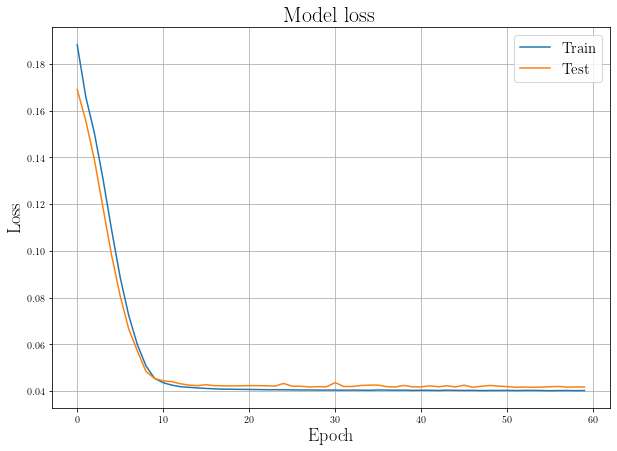

In [45]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize=22)
plt.ylabel('Loss', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.legend(['Train', 'Test'], loc='best', fontsize=15)
plt.grid(True)
plt.show()

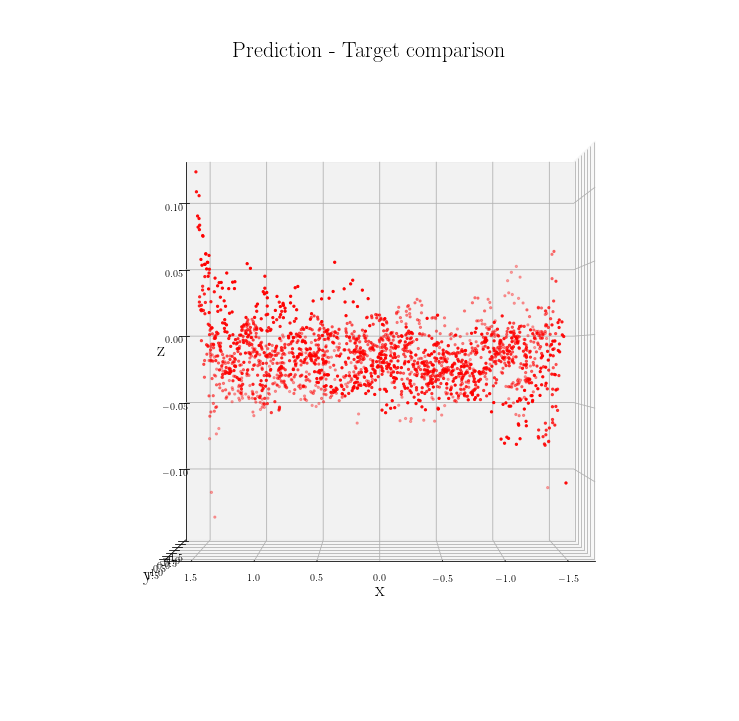

In [50]:
x_predicted = np.zeros((n_valid,2)) #x_predicted is a N_valid x 2 matrix now
y_target = np.zeros(n_valid)

for i in range(n_valid):
    #fill the x_predicted matrix and y_target
    x_predicted[i,0] = np.random.uniform(-1.5,1.5)
    x_predicted[i,1] = np.random.uniform(-1.5,1.5)
    y_target[i] = f(x_predicted[i,0],x_predicted[i,1])

y_predicted = np.transpose(model.predict(x_predicted))
#y_predicted -= y_target  #se scommentato il grafico mostra la differenza fra funzione target e funzione predetta

fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(np.transpose(x_predicted)[0], np.transpose(x_predicted)[1], y_predicted, color='red', marker='.', label='Validation Data')
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('z', fontsize=20)
ax.set_title('Prediction - Target comparison', fontsize=22)
#ax.text2D(0.05, 0.95, "Prediction Error", transform=ax.transAxes, fontsize=20)
ax.view_init(0, 90)

plt.show()

In [97]:
save_model_path='Saved/fit_2D'
model.save(filepath=save_model_path, include_optimizer=True)

INFO:tensorflow:Assets written to: Saved/fit_2D/assets


In [98]:
model_old = tf.keras.models.load_model(filepath=save_model_path)